In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [16]:
start ='2015-01-01'
end='2024-12-31'

stock='WIT'

data=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [17]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,WIT,WIT,WIT,WIT,WIT
0,2015-01-02,5.375679,5.513273,5.342466,5.465827,791000
1,2015-01-05,5.309253,5.356700,5.276041,5.356700,1489800
2,2015-01-06,5.233339,5.318743,5.162170,5.313998,729000
3,2015-01-07,5.295019,5.318742,5.228594,5.290274,600800
4,2015-01-08,5.375679,5.404147,5.337721,5.356700,720600
...,...,...,...,...,...,...
2510,2024-12-23,3.620000,3.640000,3.590000,3.600000,3823900
2511,2024-12-24,3.630000,3.630000,3.600000,3.600000,1337400
2512,2024-12-26,3.610000,3.620000,3.590000,3.600000,2152900


In [18]:
ma_100_days=data.Close.rolling(100).mean()

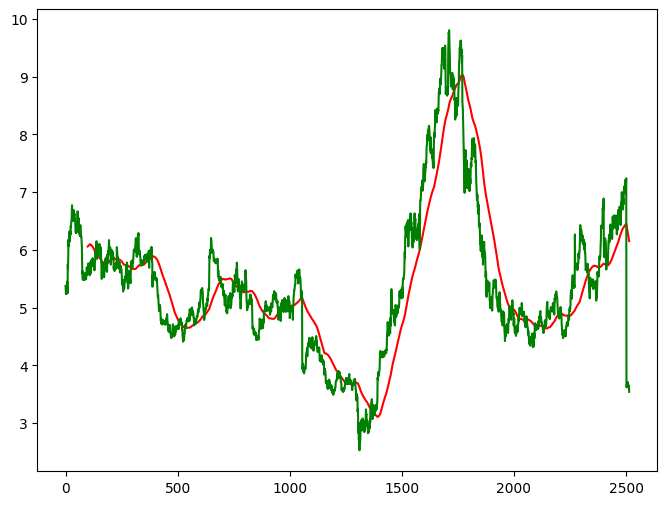

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [20]:
ma_200_days=data.Close.rolling(200).mean()

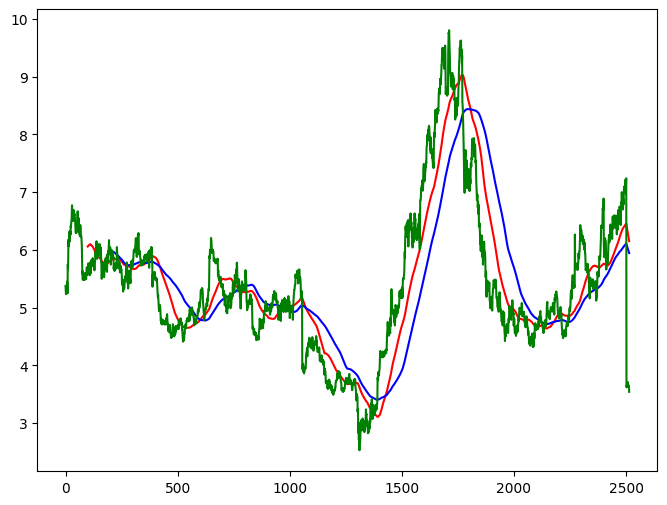

In [21]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [22]:
data.dropna(inplace=True)

In [23]:
data_train = data.Close[:int(len(data) * 0.80)]
data_test = data.Close[int(len(data) * 0.80):] 


In [24]:
data_train.shape[0] 


2012

In [25]:
data_test.shape[0]

503

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale=scaler.fit_transform(data_train)


In [28]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [29]:
x,y=np.array(x),np.array(y)

In [31]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [32]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0,2))
model.add(LSTM(units=60,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\Aakash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - loss: 0.0637
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - loss: 0.0076
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 0.0082
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.0058
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 0.0065
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0054
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0058
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0052
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0050
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0042
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0044
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0042
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0046
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0037
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - l

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [36]:
pas_100_days=data_train.tail(100)


In [37]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [38]:
data_test_scale=scaler.fit_transform(data_test)

In [39]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [40]:
x,y=np.array(x),np.array(y)

In [41]:
y_predict=model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


In [42]:
scale=1/scaler.scale_

In [43]:
y_predict=y_predict*scale

In [44]:
y=y*scale

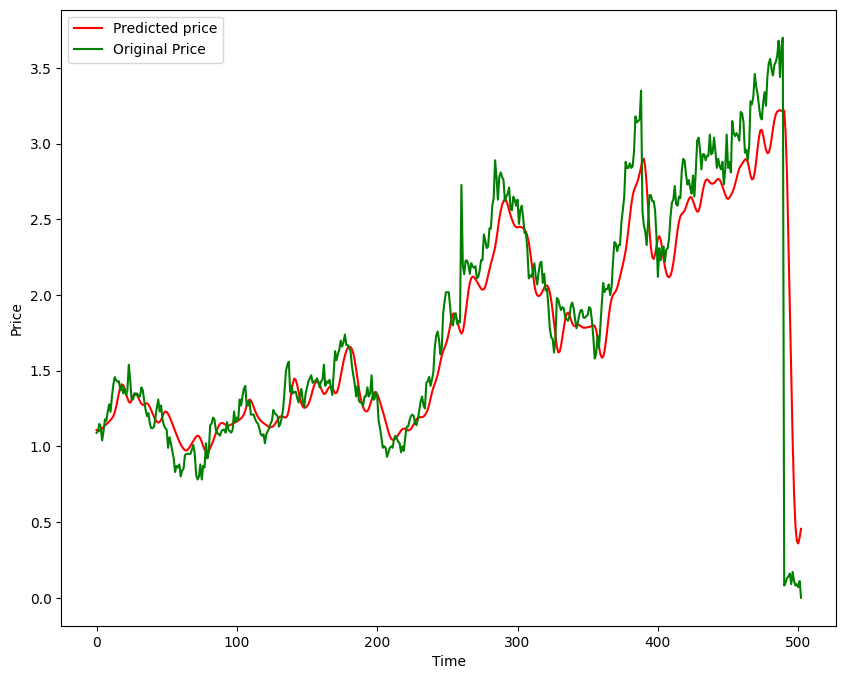

In [45]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [47]:
model.save("stock prediction model.h5")